In [1]:
%matplotlib inline

import os
# assumes jupyter server launched from root dir of repo
filepath = os.path.abspath(os.path.join(os.getcwd(), '..'))
%cd $filepath

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sys
sys.path.append(os.path.abspath(filepath))

from notebooks.preprocess_util import *
from cces_util import *

/Users/cyz/survey/active_survey


In [2]:
# Suppress verbose warnings about missing fonts
import warnings
warnings.simplefilter('ignore')

In [3]:
response_filename = "data/cces/cces18.csv"
responses = pd.read_csv(response_filename, index_col=0)

In [4]:
responses.shape

(60000, 53)

In [5]:
# drop rows with no respones
responses = responses.dropna(how='all', axis=0)
responses.shape

(60000, 53)

In [6]:
# Drop questions with no responses
responses = responses.dropna(how='all', axis=1)
responses.shape

(60000, 53)

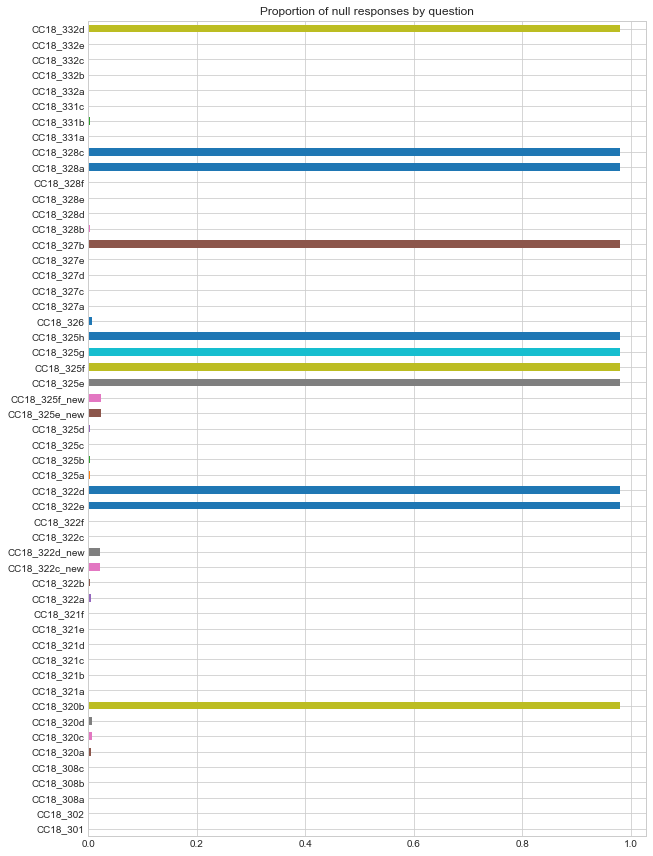

In [7]:
plot_na_proportion(responses)

In [8]:
# Drop questions with >75% nonresponse
na_proportion = compute_na_proportion(responses)
keep_questions = na_proportion < 0.75
responses = responses.iloc[:, keep_questions.tolist()]
responses.shape

(60000, 42)

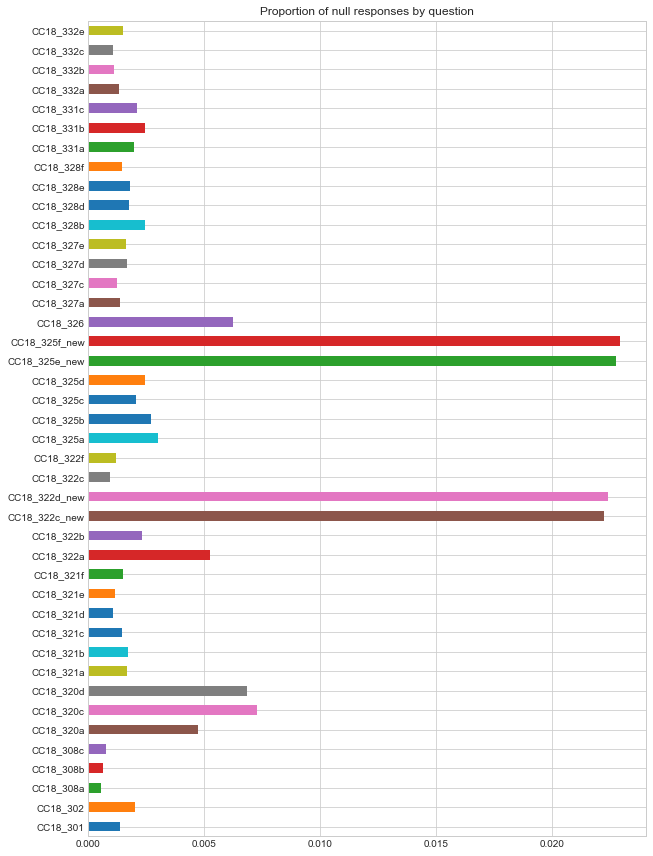

In [9]:
plot_na_proportion(responses)

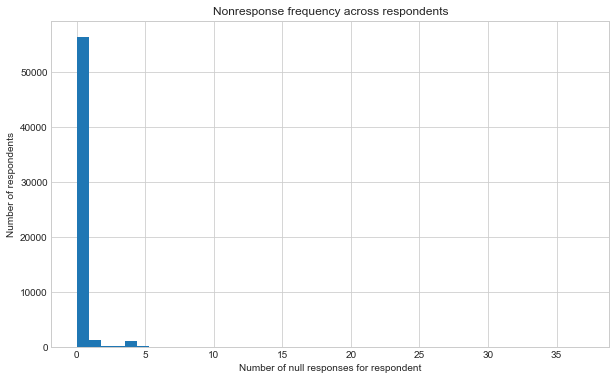

In [10]:
plot_nonresponse_freq(responses)

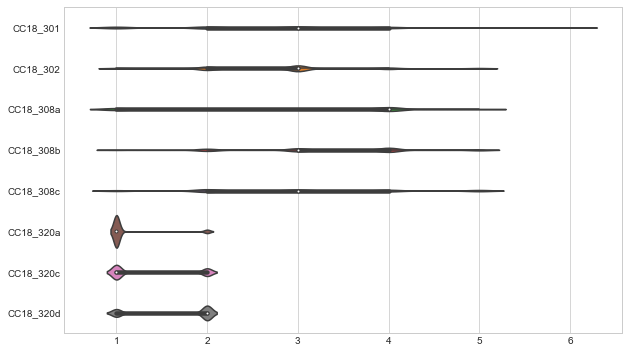

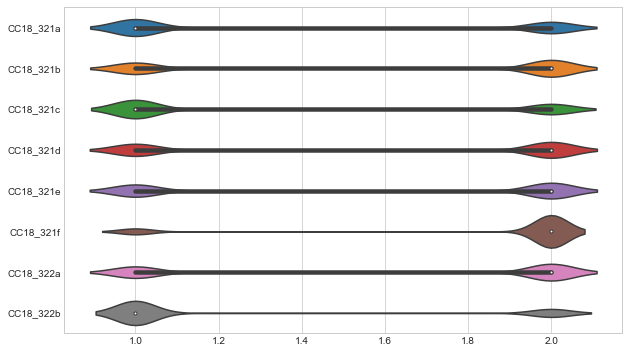

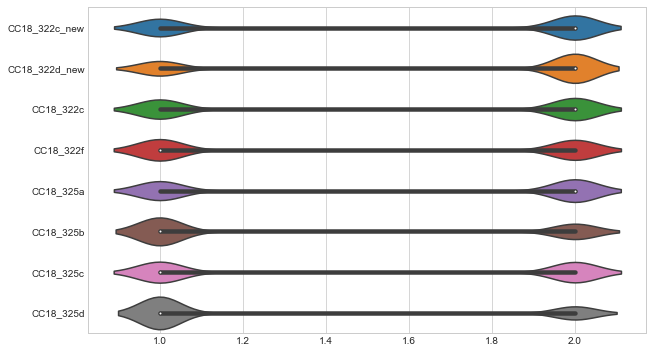

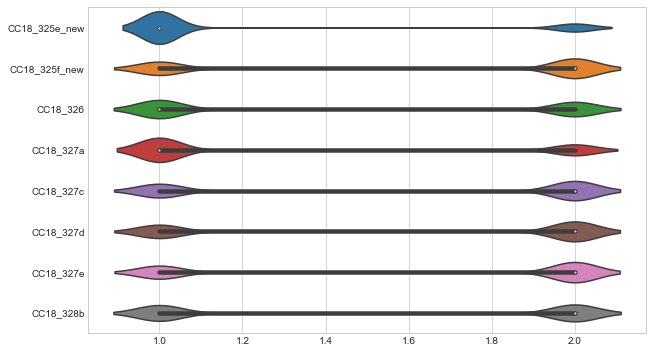

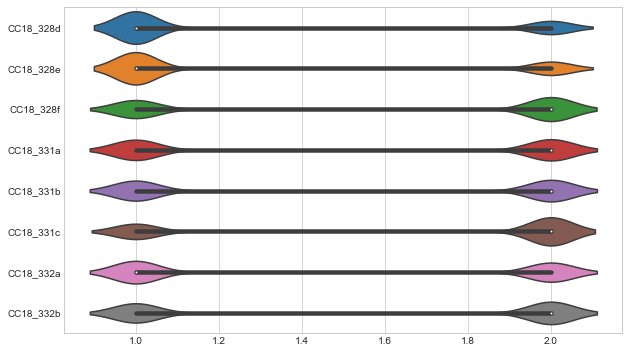

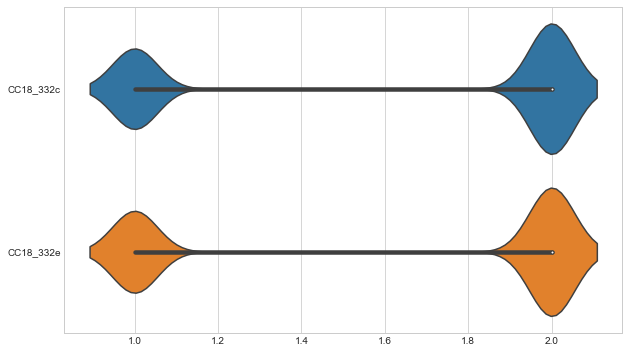

In [11]:
response_violin_plots(responses)

In [12]:
# Remove "Not sure", "Other" responses that break order; replace by NA
replace_values(responses, dict(
    CC18_301=[6],
    CC18_308a=[5],
    CC18_308b=[5],
    CC18_308c=[5]
))

Replacing 2717/60000 (4.53%) values of CC18_301 with NA
Replacing 1765/60000 (2.94%) values of CC18_308a with NA
Replacing 5854/60000 (9.76%) values of CC18_308b with NA
Replacing 8550/60000 (14.25%) values of CC18_308c with NA


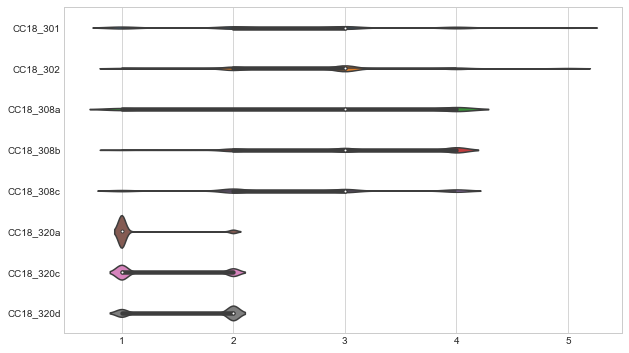

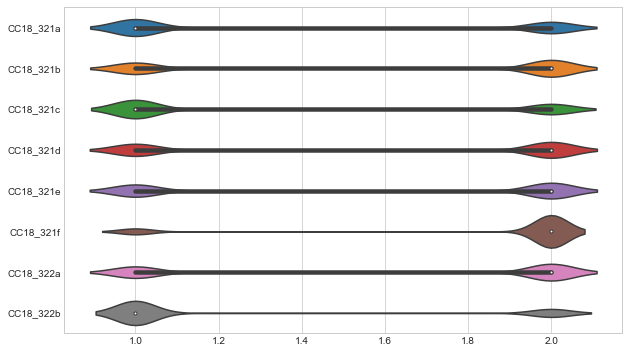

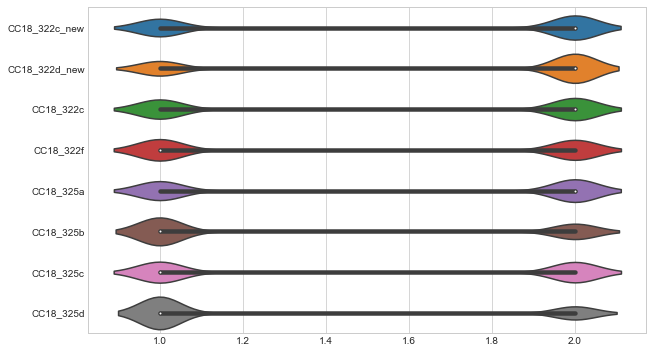

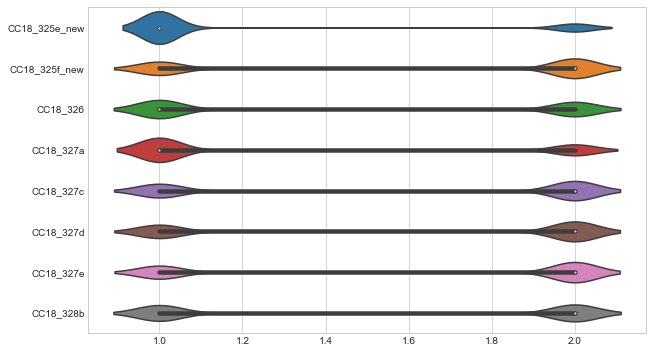

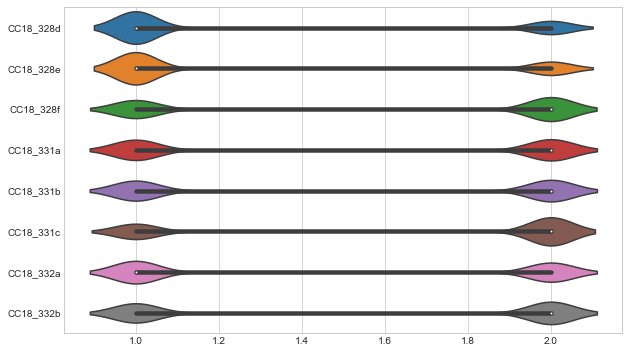

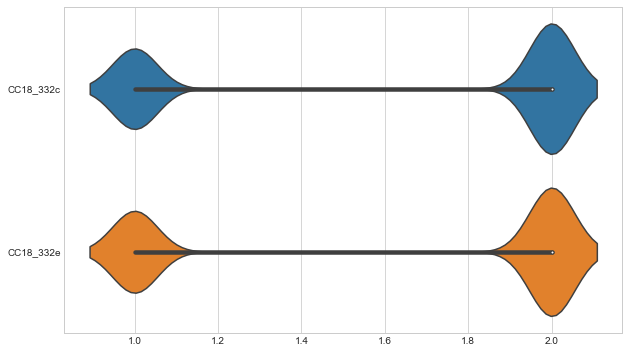

In [13]:
response_violin_plots(responses)

In [14]:
responses_ord = responses - 1  # let ordinal responses start from 0
responses_ord.to_csv("data/cces/cces18_ord.csv")

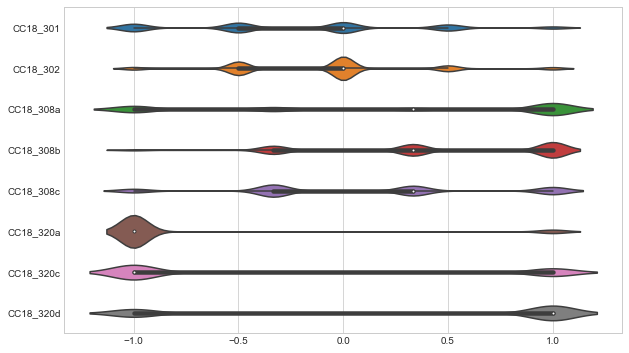

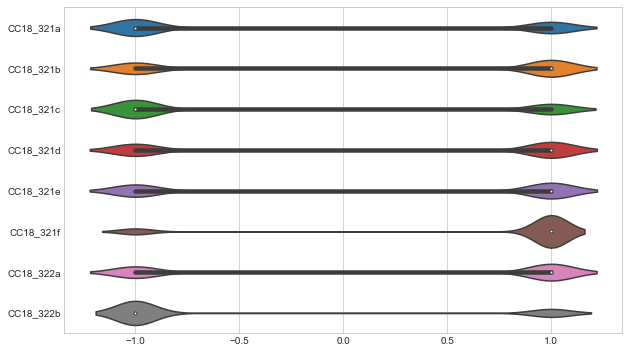

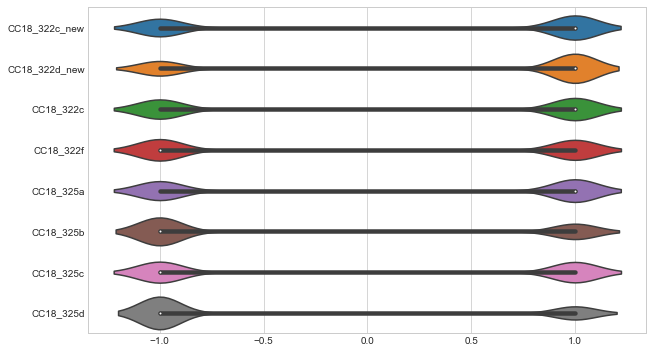

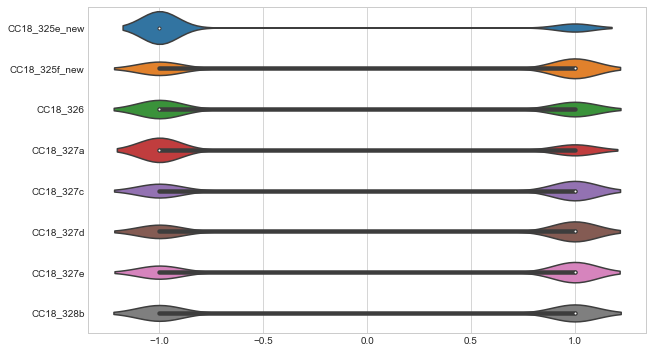

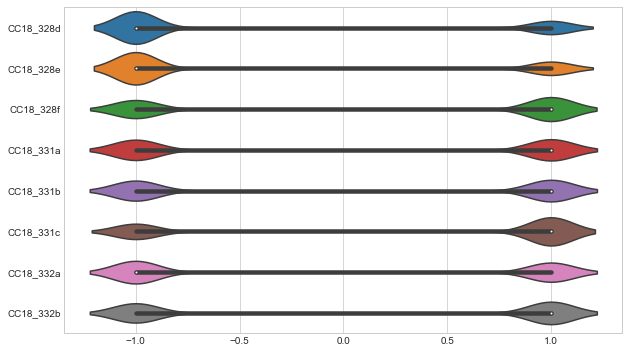

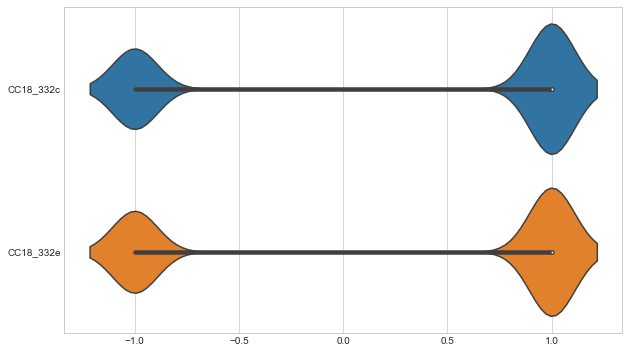

In [15]:
# center and scale responses two ways
responses_scaled = center_and_scale(responses, method='minmax')
response_violin_plots(responses_scaled)
responses_scaled.to_csv("data/cces/cces18_cs.csv", float_format='%.3f')

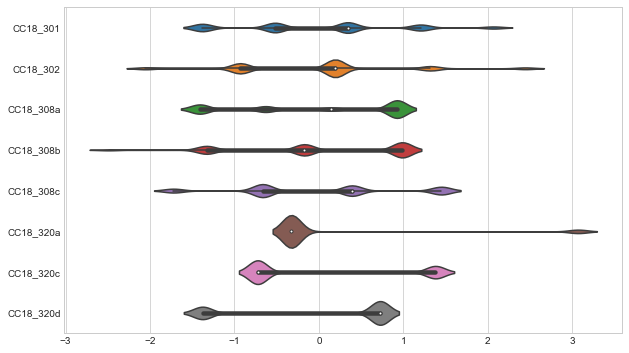

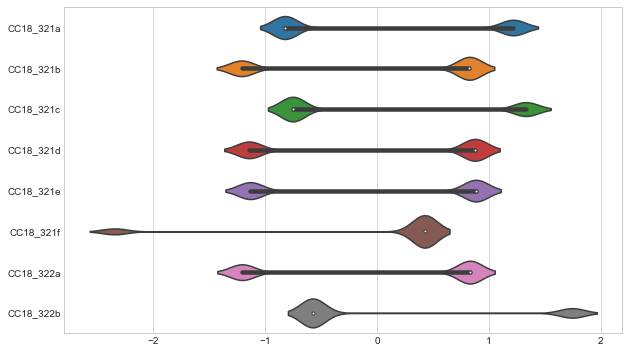

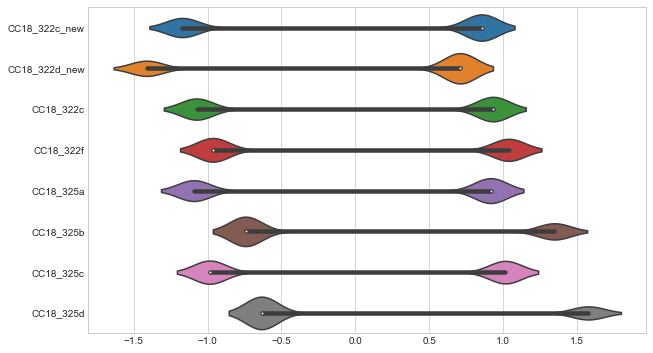

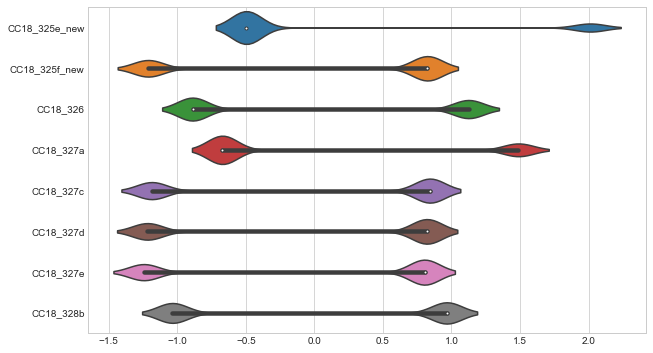

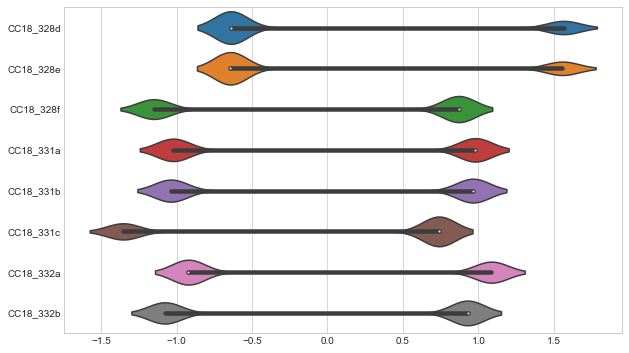

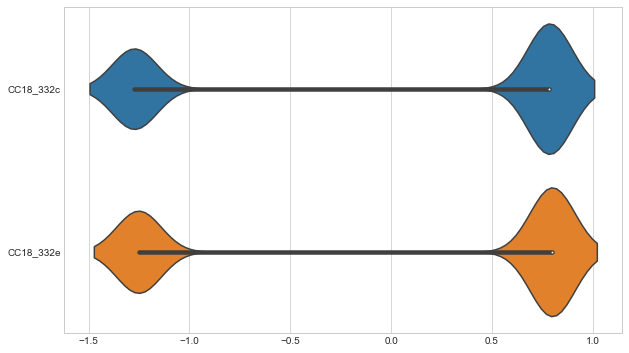

In [16]:
responses_scaled = center_and_scale(responses, method='standard')
response_violin_plots(responses_scaled)
responses_scaled.to_csv("data/cces/cces18_std.csv", float_format='%.3f')

In [17]:
# Save question names
questions = responses.columns.tolist()
metadata_filename = filepath + "/data/cces/CCES2018_OUTPUT-ddi.xml"
question_to_label = parse_question_metadata(metadata_filename)
question_df = pd.DataFrame([dict(question=q, text=question_to_label[q]) for q in questions])
question_df.to_csv("data/cces/cces18_questions.csv")